# Leaf disease detector

In [16]:
import pandas as pd 
import numpy as np 

In [17]:
# importing required libraries
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from glob import glob
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [31]:
IMAGE_SIZE = [224,224]
train_path = "/content/drive/MyDrive/Toamto/train"
valid_path = "/content/drive/MyDrive/Toamto/valid"

# creating the inception layer
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE + [3])

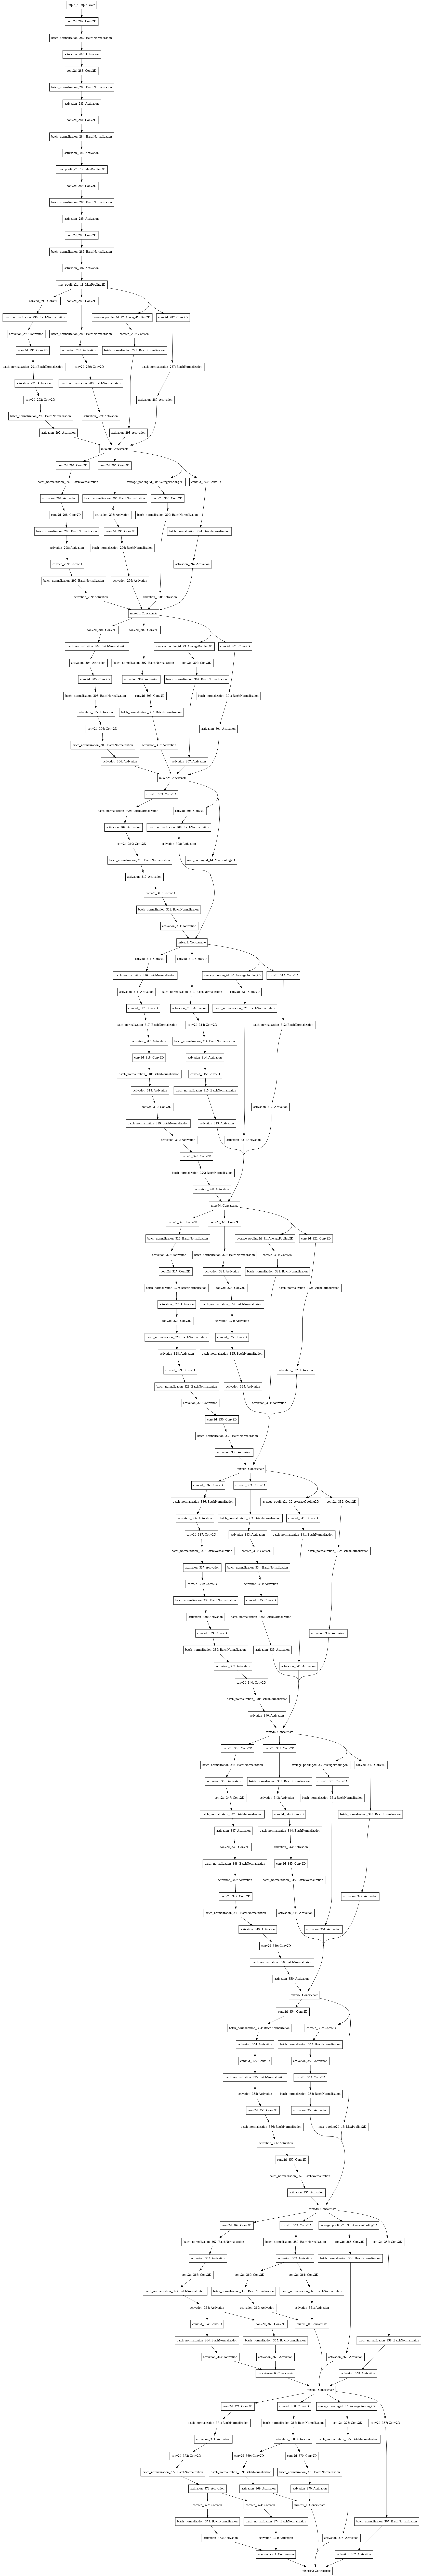

In [19]:
plot_model(inception, to_file='model.png')

In [32]:
# avoid training existing weigths
for layer in inception.layers:
  layer.trainable = False

In [33]:
# folder used for output of layers 
folders = glob('/content/drive/MyDrive/Toamto/train/*')
folders

['/content/drive/MyDrive/Toamto/train/Tomato___healthy',
 '/content/drive/MyDrive/Toamto/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Toamto/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Toamto/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Toamto/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Toamto/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Toamto/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Toamto/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Toamto/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Toamto/train/Tomato___Late_blight']

In [34]:
# flatten the output of inception model 
x = Flatten()(inception.output)

In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

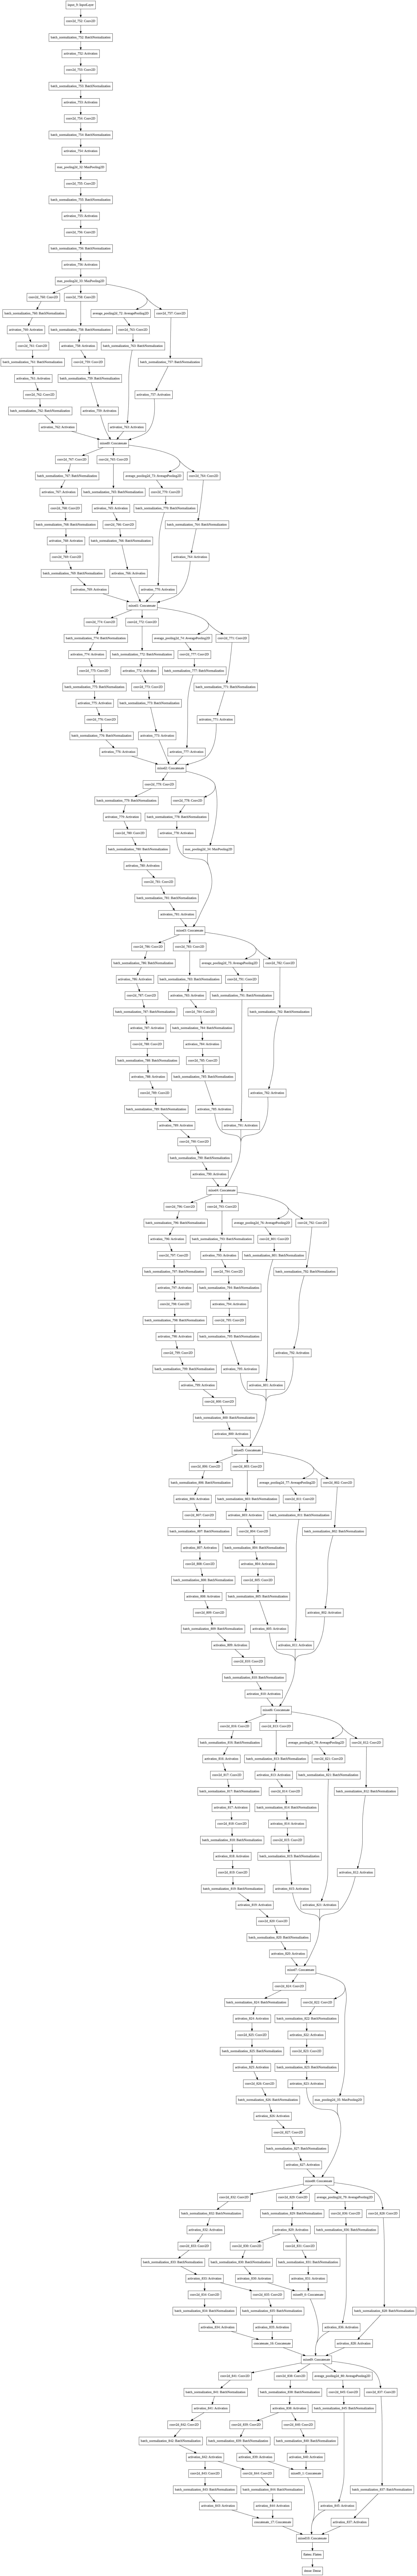

In [36]:
# create model
model = Model(inputs = inception.input, outputs=prediction)
plot_model(model)

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_752 (Conv2D)             (None, 111, 111, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_752 (BatchN (None, 111, 111, 32) 96          conv2d_752[0][0]                 
__________________________________________________________________________________________________
activation_752 (Activation)     (None, 111, 111, 32) 0           batch_normalization_752[0][0]    
______________________________________________________________________________________________

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Toamto/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = train_datagen.flow_from_directory('/content/drive/My Drive/Toamto/valid',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 4585 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)